In [1]:
from PyTorch_VAE.models import VanillaVAE
import numpy as np
from tqdm import tqdm
import torch
from reconstruct_translator import rsp_translator

In [2]:
import matplotlib.pyplot as plt

In [3]:
model = VanillaVAE(1, latent_dim=128, hidden_dims=None)
model.load_state_dict(torch.load('Image_vae_m2s1'))
train_imgs = np.load('../data/Processed_Tang_data/all_sites_data_prepared/pics_data/train_img_' + 'm2s1' + '.npy')
val_imgs = np.load('../data/Processed_Tang_data/all_sites_data_prepared/pics_data/val_img_' + 'm2s1' + '.npy')
val_imgs = np.transpose(val_imgs, (0, 3, 1, 2))
val_y = np.load('../data/Processed_Tang_data/all_sites_data_prepared/New_response_data/valRsp_'+'m2s1'+'.npy')
rain_imgs = np.transpose(train_imgs, (0, 3, 1, 2))
device = 'cuda'
model.to(device)

VanillaVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Se

In [4]:
translator = rsp_translator(299,128)
translator.load_state_dict(torch.load("rsp_translator"))
translator.to(device)

rsp_translator(
  (layers): Sequential(
    (0): Linear(in_features=299, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sigmoid()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Sigmoid()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Sigmoid()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=1024, out_features=512, bias=True)
    (13): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Sigmoid()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear): Linear(in_features=512, out_features=128, bias=True)
)

In [5]:
sample = torch.tensor(val_y[:20],dtype=torch.float).to(device)
origin = val_imgs[:10]
z = translator(sample)
output = model.decode(z)

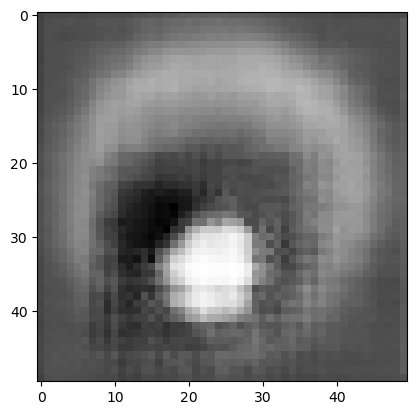

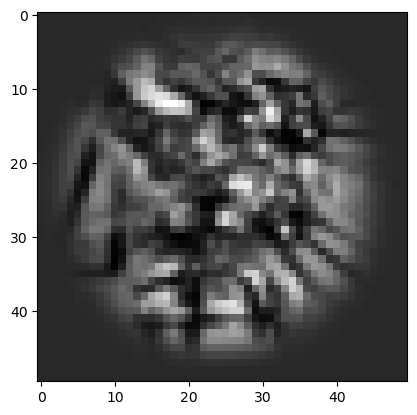

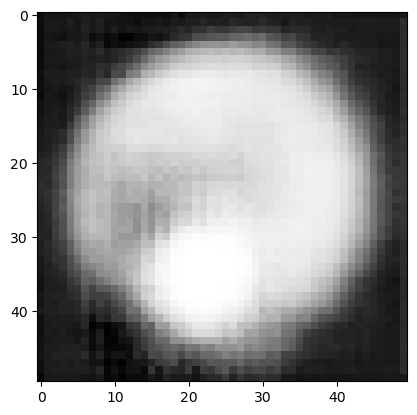

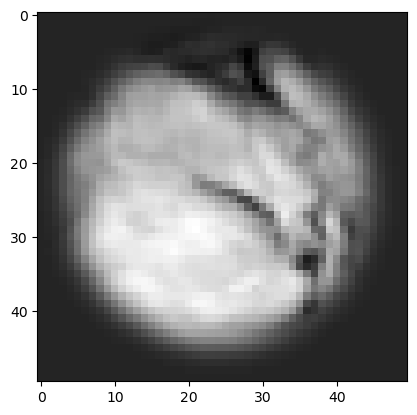

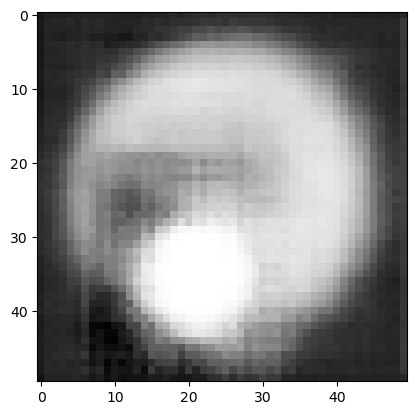

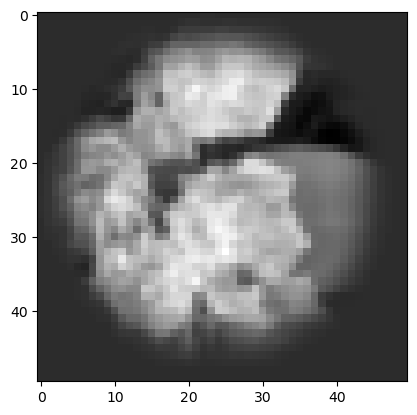

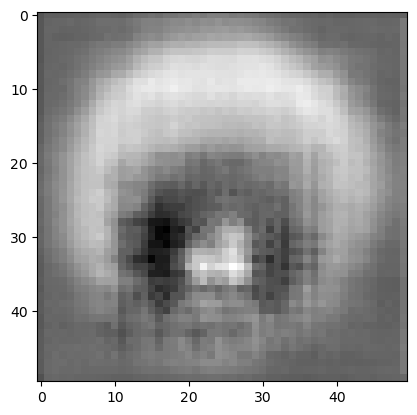

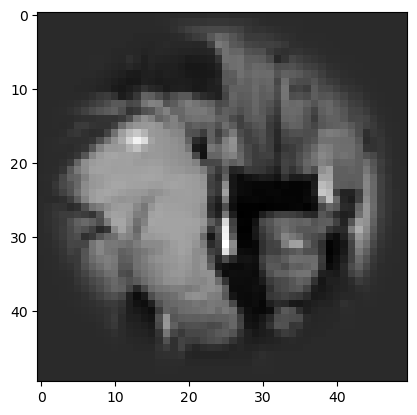

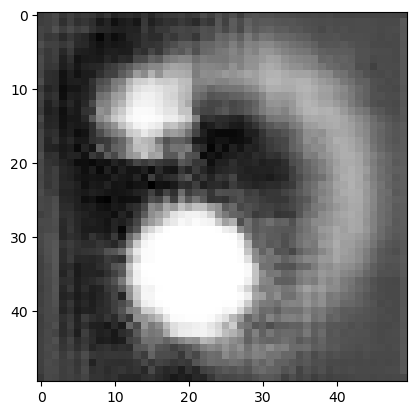

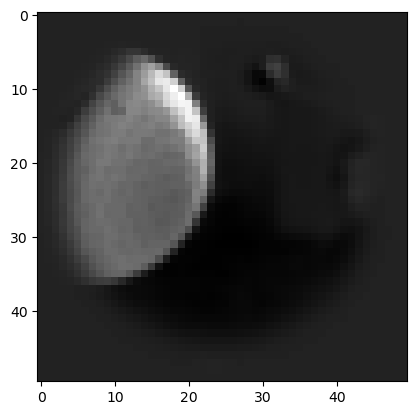

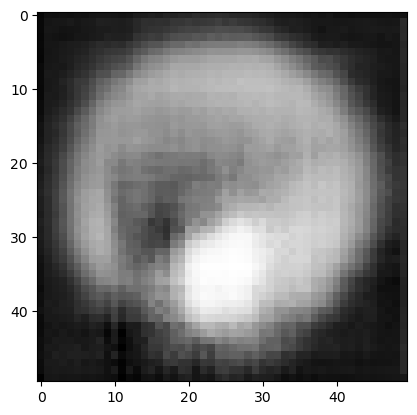

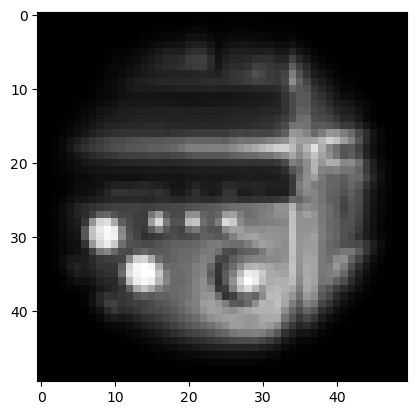

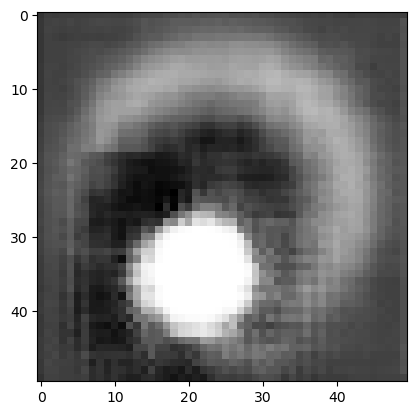

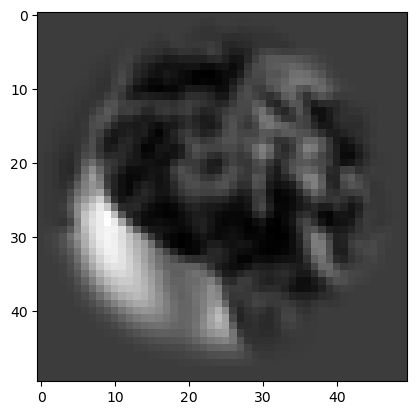

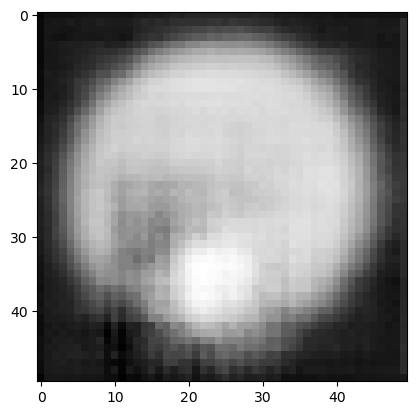

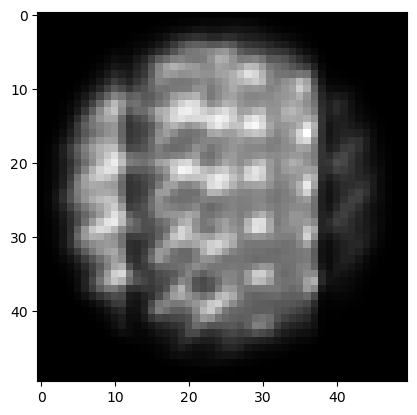

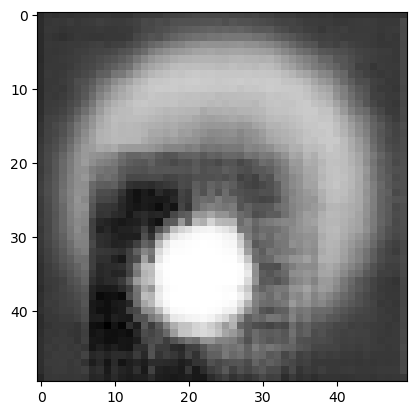

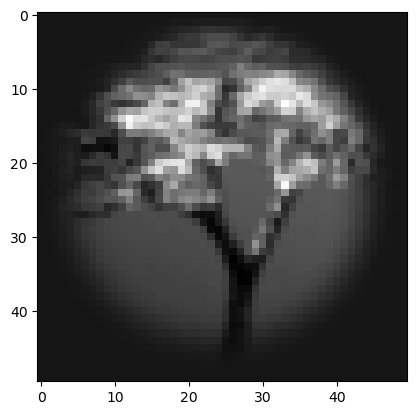

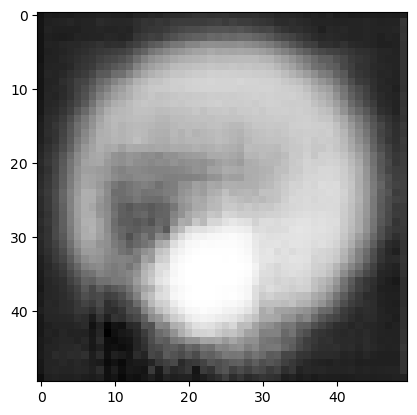

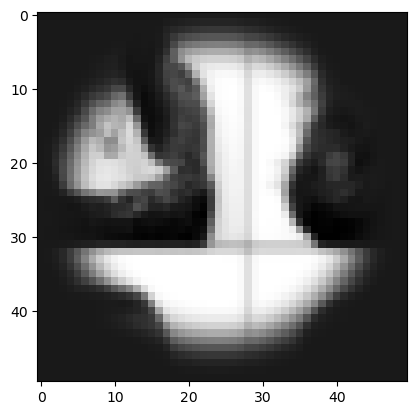

In [6]:
recon = output.detach().cpu().numpy()
#origin = output[1].detach().cpu().numpy()
for r_img, img in zip(recon,origin):
    r_img = np.reshape(r_img, (50,50))
    img = np.reshape(img, (50,50))
    plt.imshow(r_img, interpolation='nearest', cmap='gray')
    plt.show()
    plt.imshow(img, interpolation='nearest', cmap='gray')
    plt.show()

In [5]:
sample = torch.tensor(val_imgs[:20],dtype=torch.float).to(device)
output = model(sample)

newimg


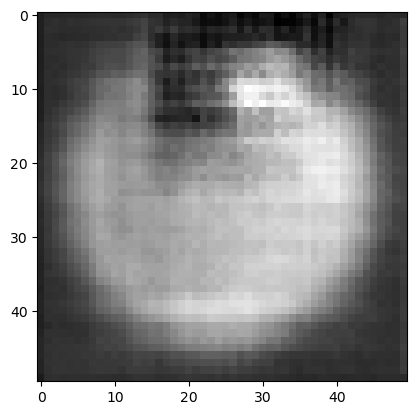

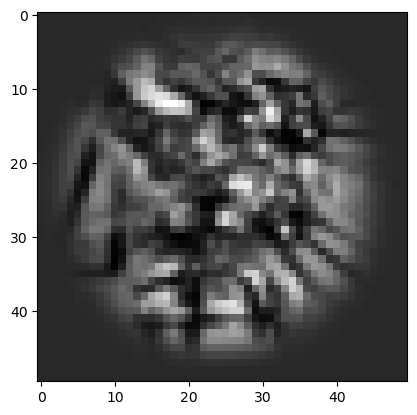

newimg


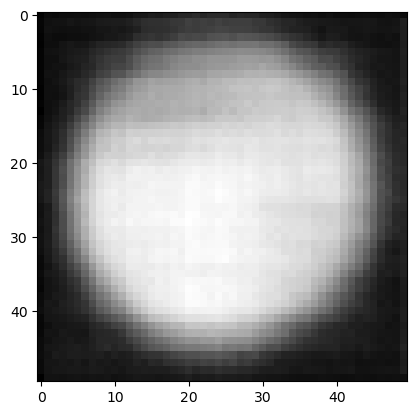

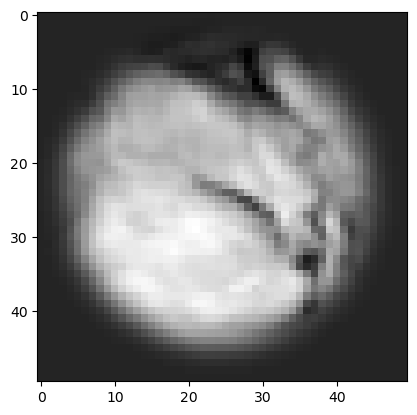

newimg


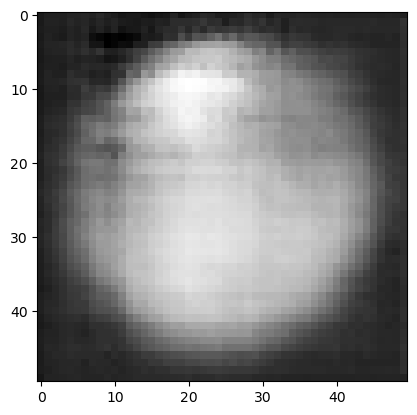

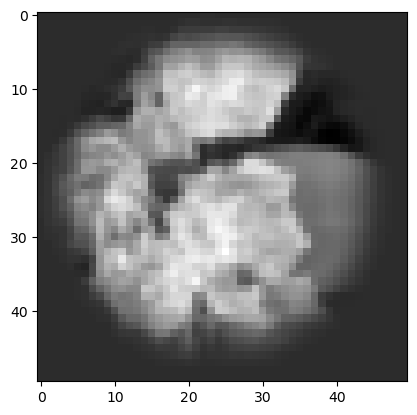

newimg


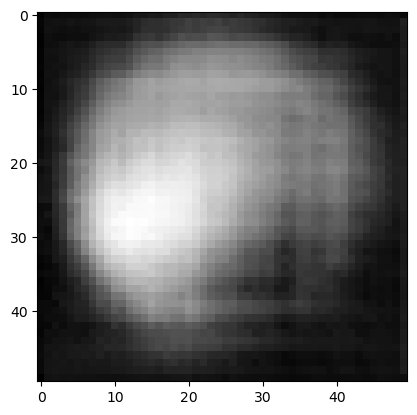

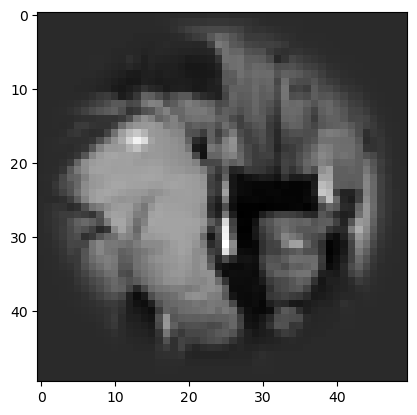

newimg


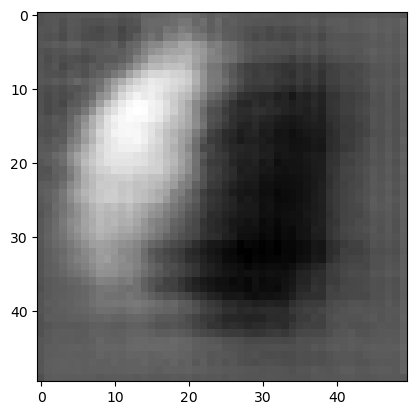

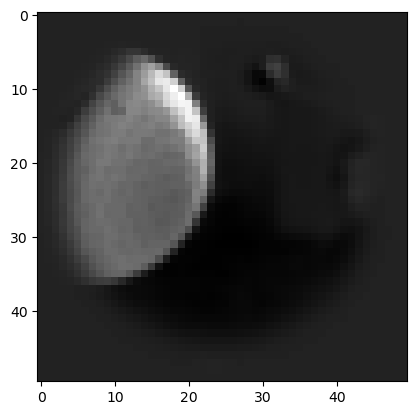

newimg


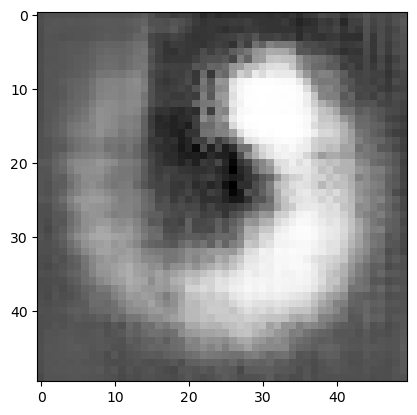

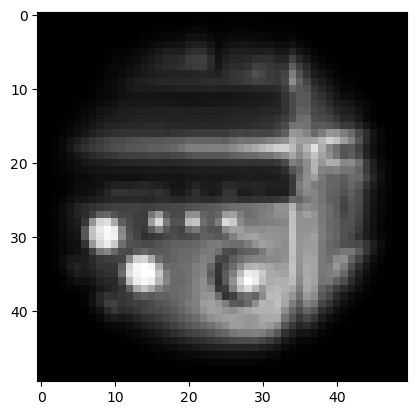

newimg


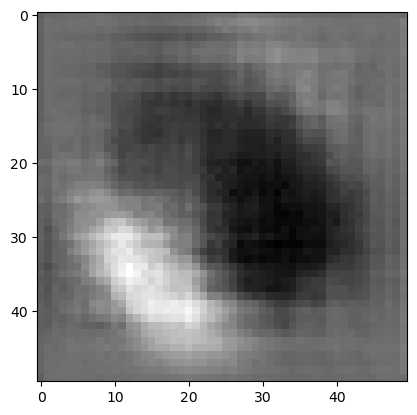

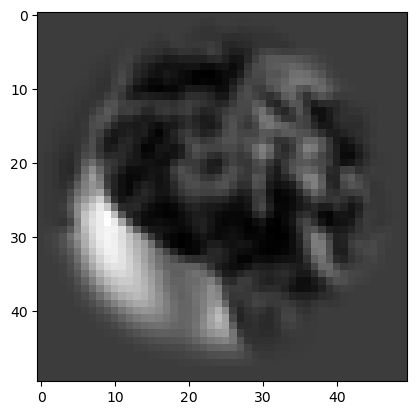

newimg


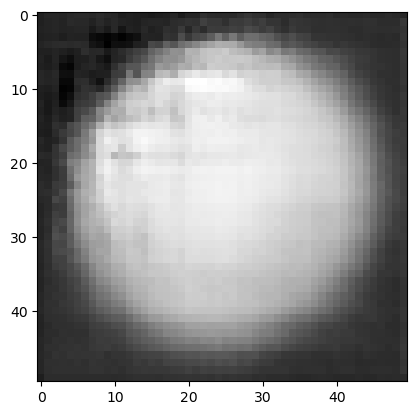

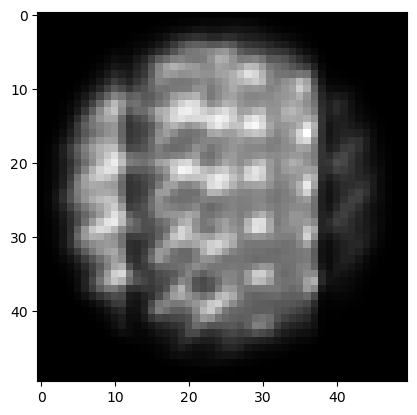

newimg


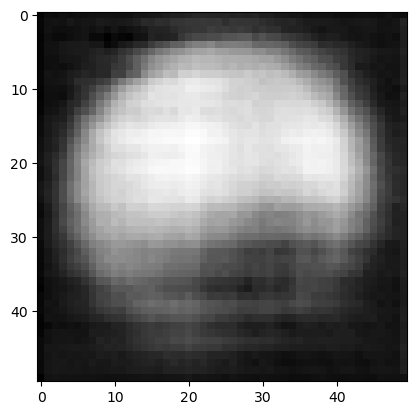

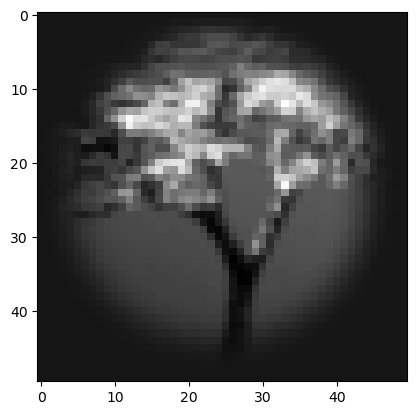

newimg


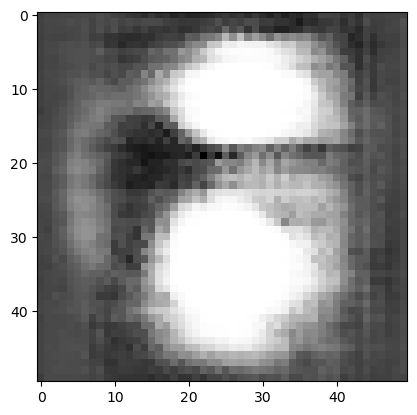

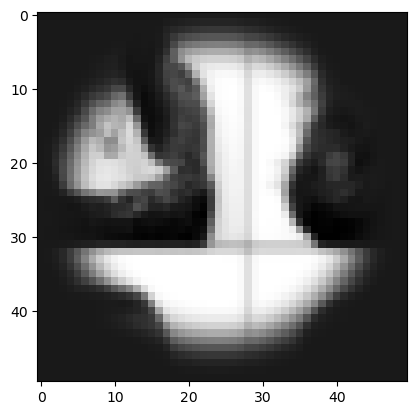

newimg


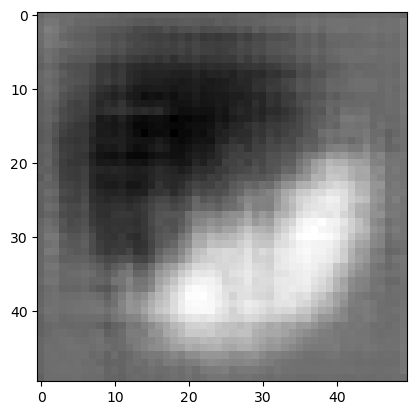

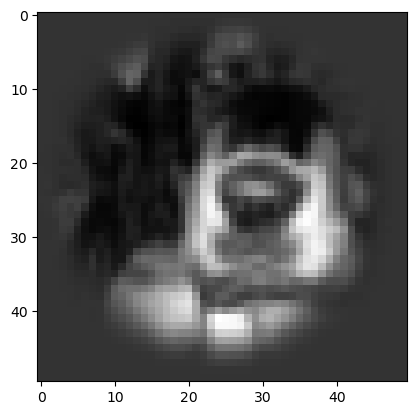

newimg


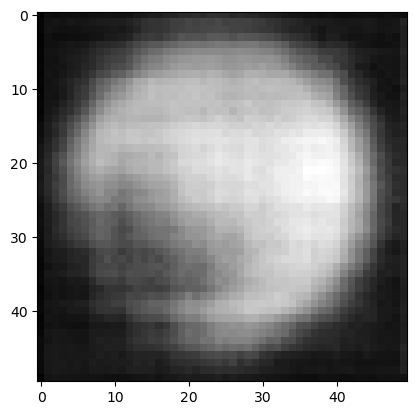

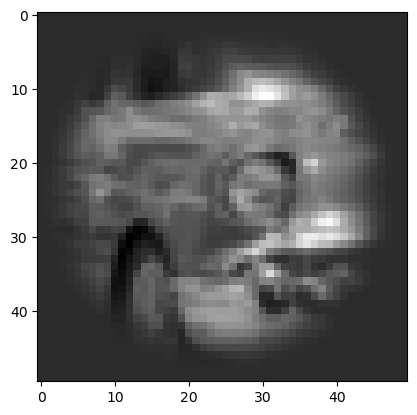

newimg


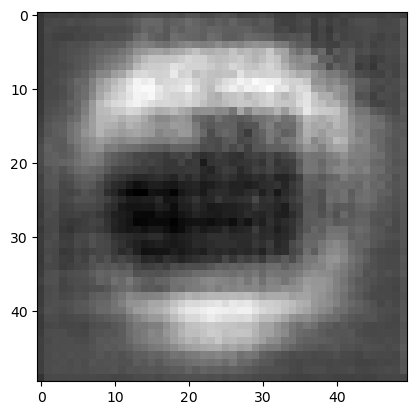

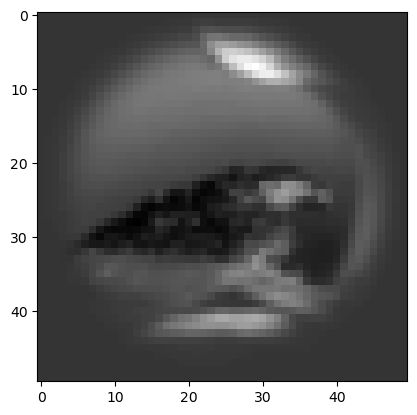

newimg


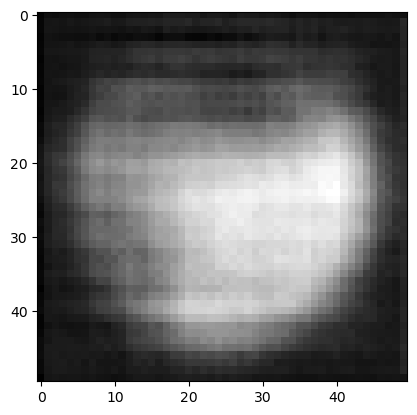

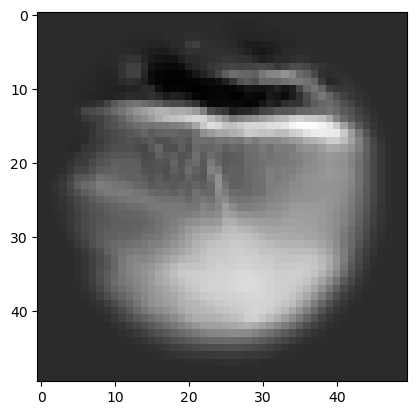

newimg


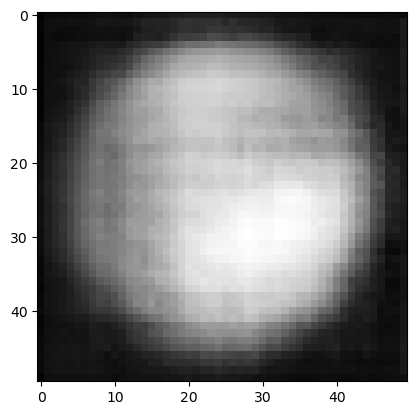

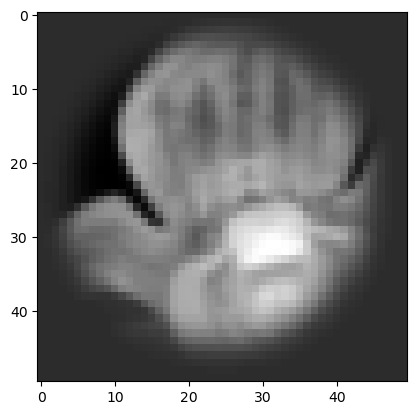

newimg


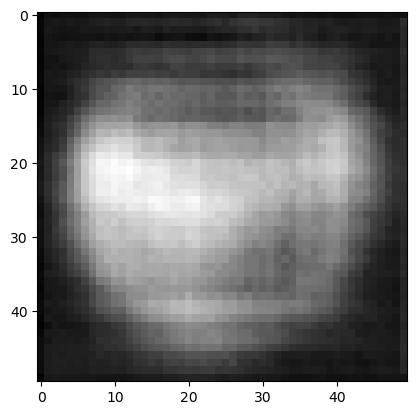

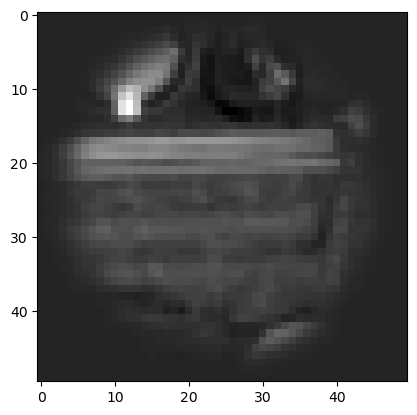

newimg


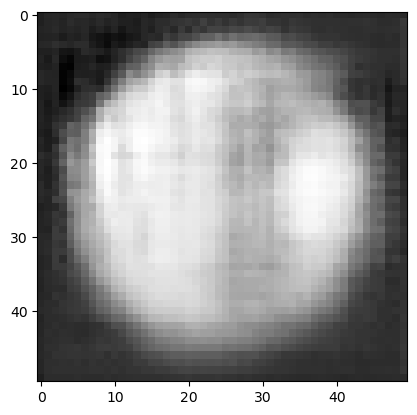

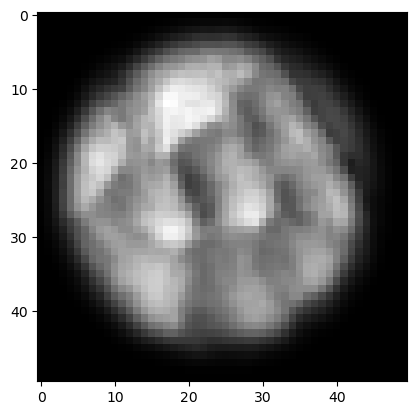

newimg


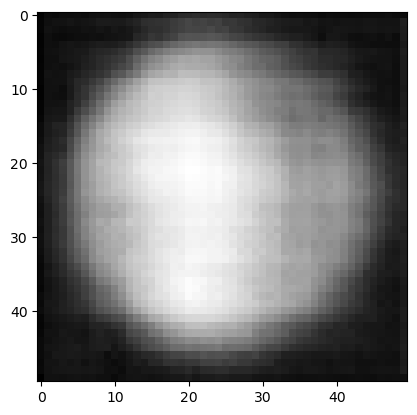

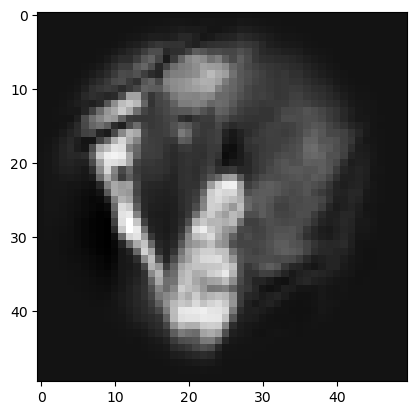

newimg


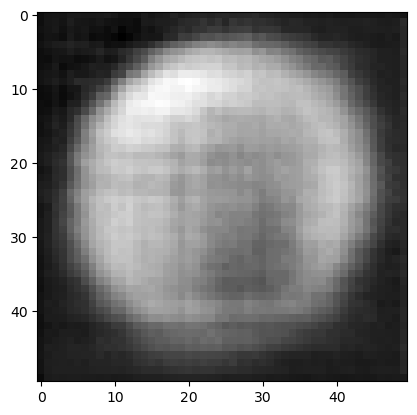

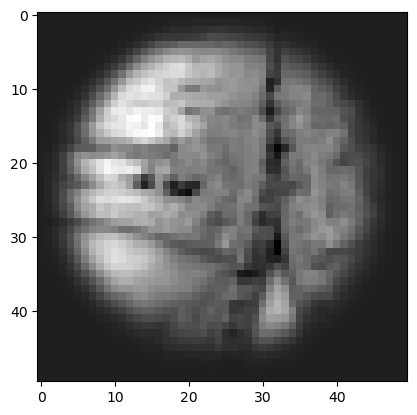

newimg


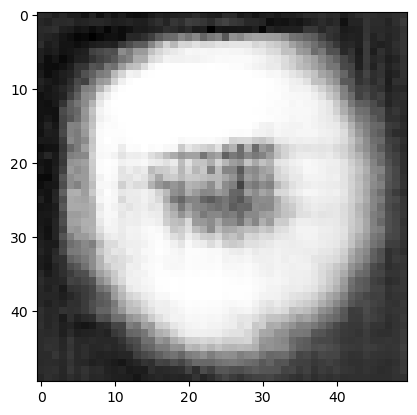

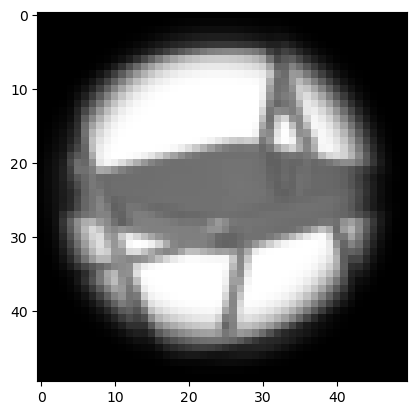

In [6]:
recon = output[0].detach().cpu().numpy()
origin = output[1].detach().cpu().numpy()
for r_img, img in zip(recon,origin):
    r_img = np.reshape(r_img, (50,50))
    img = np.reshape(img, (50,50))
    print("newimg")
    plt.imshow(r_img, interpolation='nearest', cmap='gray')
    plt.show()
    plt.imshow(img, interpolation='nearest', cmap='gray')
    plt.show()

In [7]:
test_image = plt.imread("Albert_Einstein_Head.jpg")
padded_img = np.zeros((4350,4350))
padded_img[:4333,:3250] = test_image
new_img = np.zeros((4350,4350))
for i in range (round(4350/50)):
    for j in range (round(4350/50)):
        actual_i = i*50
        actual_j = j*50
        img_slice = np.reshape(padded_img[actual_i:actual_i+50, actual_j:actual_j+50], (1,1,50,50))
        img_slice = torch.tensor(img_slice,dtype=torch.float).to(device)
        output = model(img_slice)[0].detach().cpu().numpy()
        # plt.imshow(np.reshape(img_slice.detach().cpu().numpy(),(50,50)), interpolation='nearest', cmap='gray')
        # plt.show()
        # plt.imshow(np.reshape(output,(50,50)), interpolation='nearest', cmap='gray')
        # plt.show()
        new_img[actual_i:actual_i+50,actual_j:actual_j+50] = np.reshape(output,(50,50))

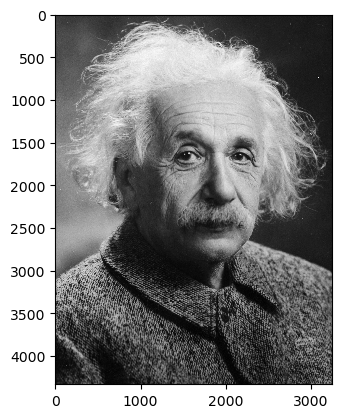

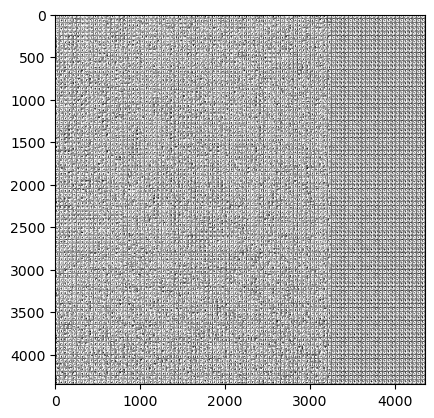

In [8]:
plt.imshow(test_image, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(new_img, interpolation='nearest', cmap='gray')
plt.show()